Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.decomposition import PCA
import autoreload
%load_ext autoreload
%autoreload 2
import python_code.Scripts as sc
import python_code.Reference as ref

In [2]:
#New Mexico
nm07= pd.read_csv('./data/clean_nm07.csv')
nm17= pd.read_csv('./data/clean_nm17.csv')

#Nebraska
ne07= pd.read_csv('./data/clean_ne07.csv')
ne17= pd.read_csv('./data/clean_ne17.csv')

Feature Selection

Correlated Dataframes

Correlation Plots
Correlation Dataframe code found in Scripts.py:

In [3]:
# def corr_df(fullname, dataset):
#     """Creates a dataframe on .corr(), used for unit categories"""
#     fullname_df= pd.DataFrame()
#     for feature in fullname['Table 1']:
#         try:
#             fullname_df[feature]= dataset[feature]
#         except:
#             continue
#     fullname_df['CAT_ELIG']=dataset['CAT_ELIG'].astype("float64")
#     return fullname_df

Referenced csv files

In [4]:
# #2007 Datasets
# unit07_demo= pd.read_csv('./data/07_DataDict/UNIT_Demo.csv')
# unit07_assets= pd.read_csv('./data/07_DataDict/UNIT_Assets.csv')
# unit07_exded= pd.read_csv('./data/07_DataDict/UNIT_ExDed.csv')
# unit07_inc= pd.read_csv('./data/07_DataDict/UNIT_Inc.csv')
# per07_char= pd.read_csv('./data/07_DataDict/PERS_Char.csv')
# per07_inc= pd.read_csv('./data/07_DataDict/PERS_Inc.csv')

# #2017 Datasets
# unit17_demo= pd.read_csv('./data/17_DataDict/UNIT_Demo.csv')
# unit17_assets= pd.read_csv('./data/17_DataDict/UNIT_Assets.csv')
# unit17_exded= pd.read_csv('./data/17_DataDict/UNIT_ExDed.csv')
# unit17_inc= pd.read_csv('./data/17_DataDict/UNIT_Inc.csv')
# per17_char= pd.read_csv('./data/17_DataDict/PERS_Char.csv')
# per17_inc= pd.read_csv('./data/17_DataDict/PERS_Inc.csv')

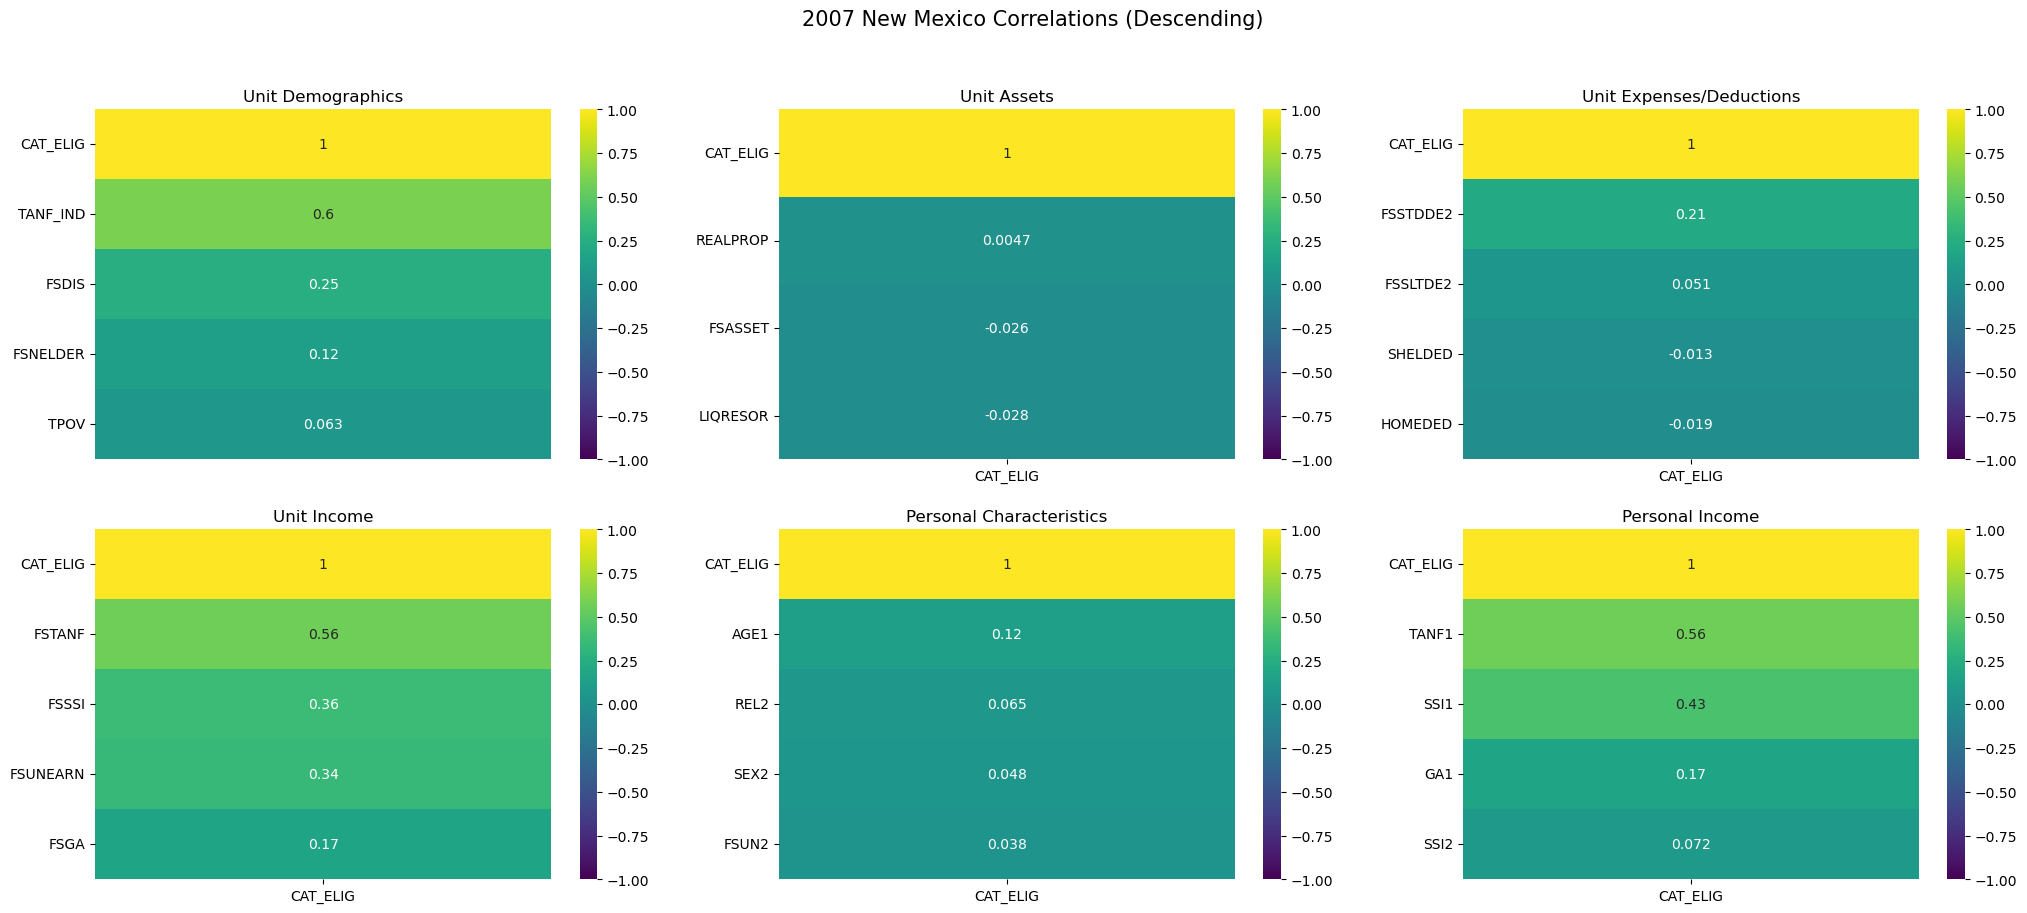

In [5]:
#New Mexico 2007 Correlations Descending
plt.figure(figsize=(25,10))
plt.suptitle("2007 New Mexico Correlations (Descending)", fontsize=15)
plt.subplot(2,3,1)
#2 rows, 3 columns,plot 1 
sns.heatmap(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
#are comparing what you get for corr_df to this .corr()[['CAT_ELIG']]
#sorting by descending to show the strength of correlation
#annot is annotating what each color corresponds to which attribute(xtick lables)
#be sure to call csv files outside of plt code
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Characteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_nm07.png');

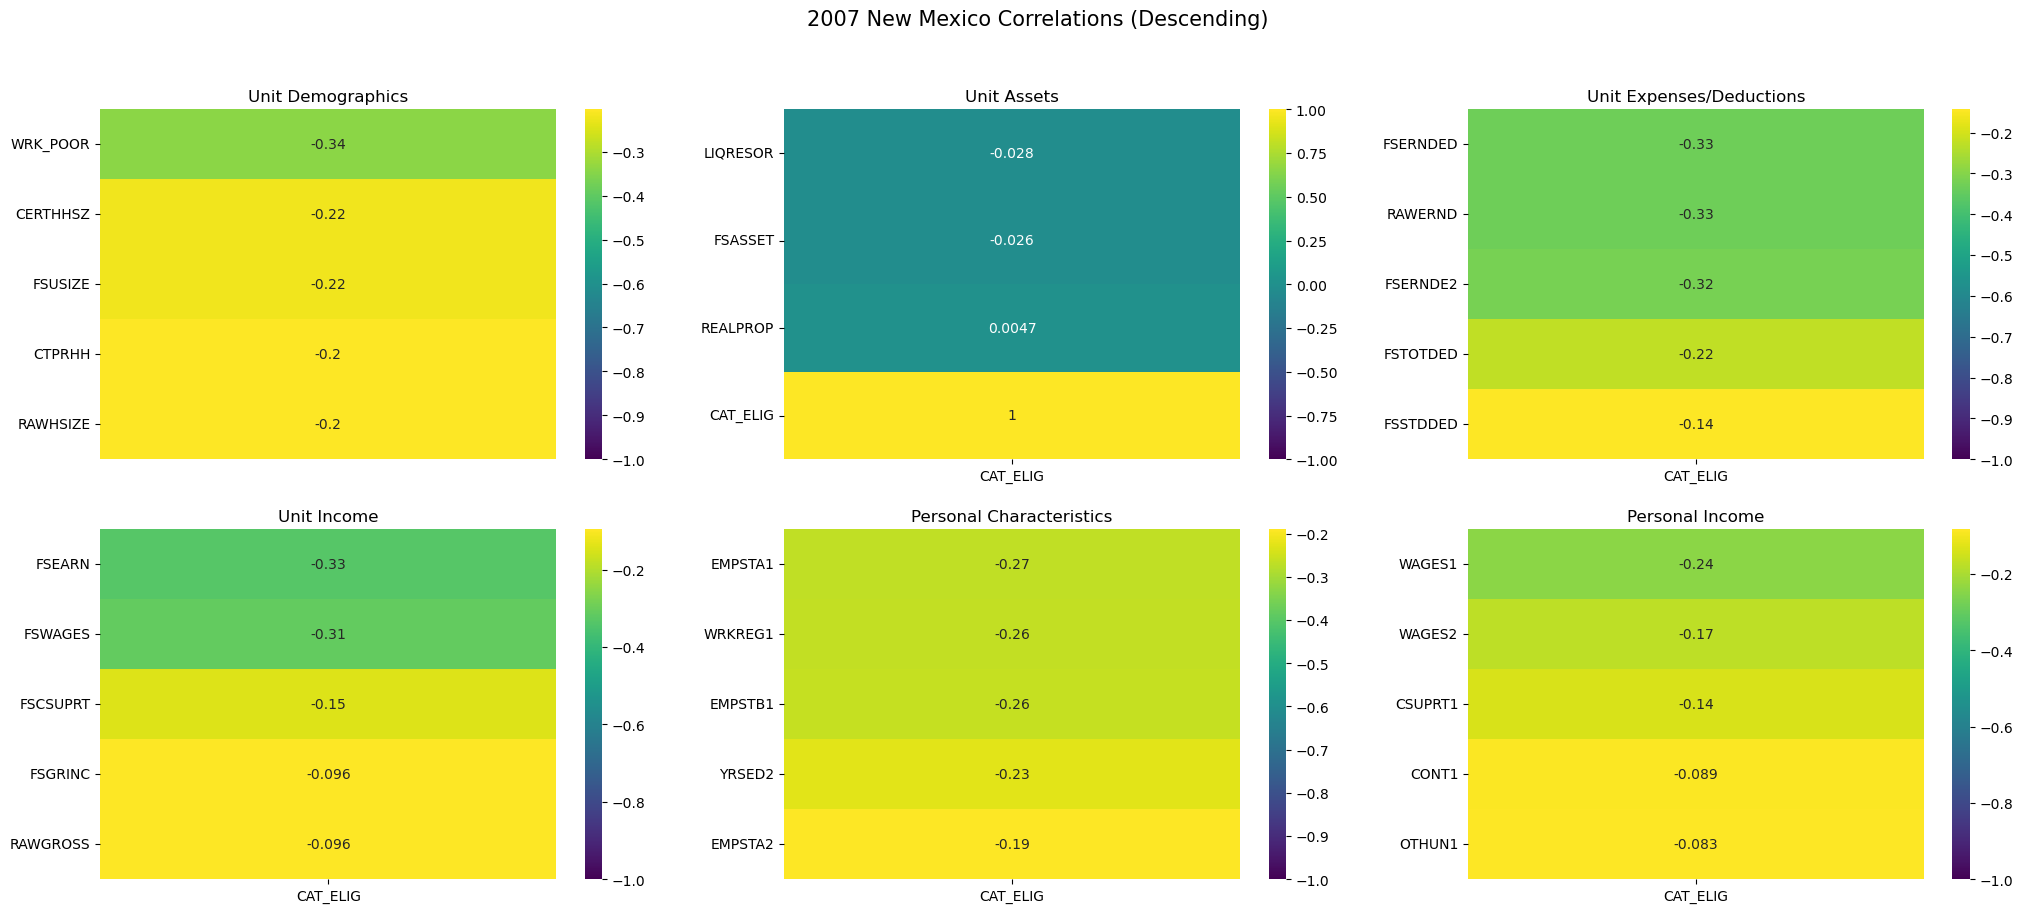

In [6]:
#New Mexico 2007 Correlations Descending
plt.figure(figsize=(25,10))
plt.suptitle("2007 New Mexico Correlations (Descending)", fontsize=15)
plt.subplot(2,3,1)
#2 rows, 3 columns,plot 1 
sns.heatmap(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
#are comparing what you get for corr_df to this .corr()[['CAT_ELIG']]
#sorting by descending to show the strength of correlation
#annot is annotating what each color corresponds to which attribute(xtick lables)
#be sure to call csv files outside of plt code
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Characteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_nm07.png');

In [7]:
sc.corr_df(ref.unit07_demo, nm17).corr()['CAT_ELIG']
# sc.corr_df(ref.unit07_demo, nm07)1


CERTHHSZ   NaN
CTPRHH     NaN
FSDIS      NaN
FSNELDER   NaN
FSNGMOM    NaN
FSNK0T4    NaN
FSNK5T17   NaN
FSNKID     NaN
FSNONCIT   NaN
FSUSIZE    NaN
FYWGT      NaN
HWGT       NaN
RAWHSIZE   NaN
REGION     NaN
REGIONCD   NaN
STATE      NaN
TANF_IND   NaN
TPOV       NaN
WRK_POOR   NaN
CAT_ELIG   NaN
Name: CAT_ELIG, dtype: float64

C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


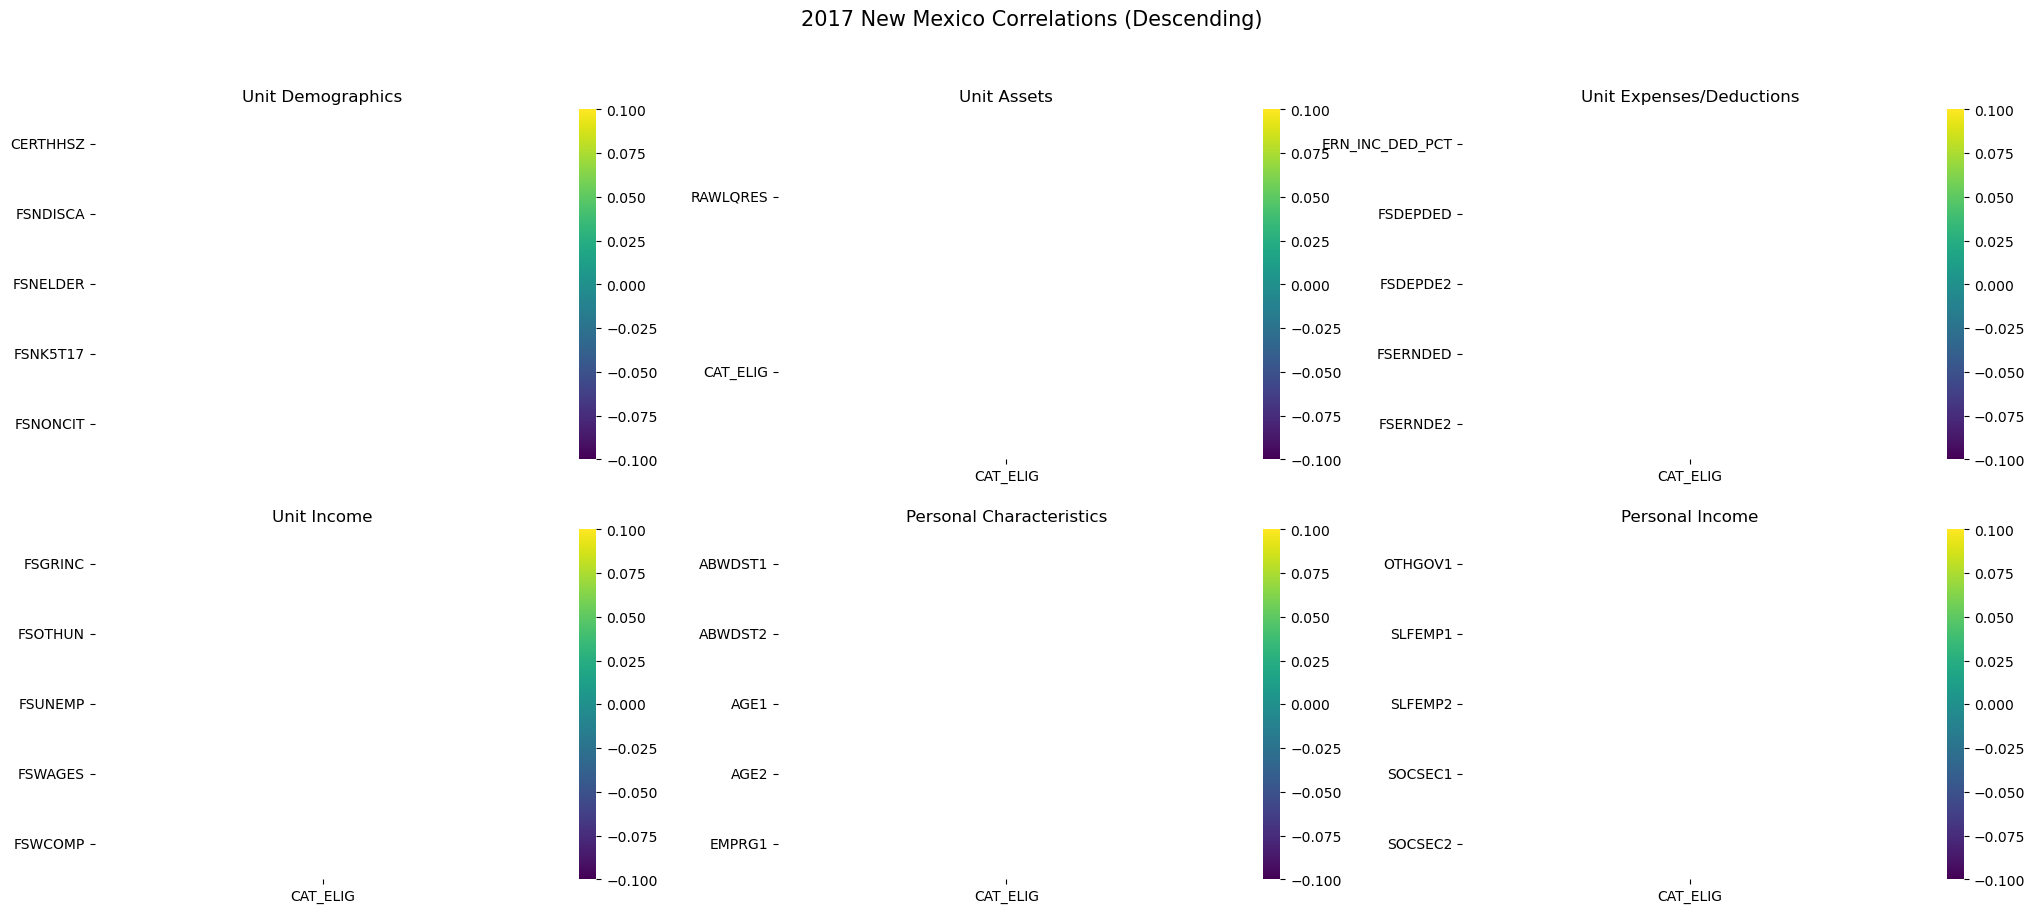

In [8]:
#New Mexico 2017 Correlations Descending
plt.figure(figsize=(25,10))
plt.suptitle("2017 New Mexico Correlations (Descending)", fontsize=15)
plt.subplot(2,3,1)
#2 rows, 3 columns,plot 1 
sns.heatmap(sc.corr_df(ref.unit17_demo, nm17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
#are comparing what you get for corr_df to this .corr()[['CAT_ELIG']]
#sorting by descending to show the strength of correlation
#annot is annotating what each color corresponds to which attribute(xtick lables)
#be sure to call csv files outside of plt code
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit17_assets, nm17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit17_exded, nm17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per17_char, nm17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Characteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_nm17.png');

In [9]:
#New Mexico 2017 Correlations Ascending

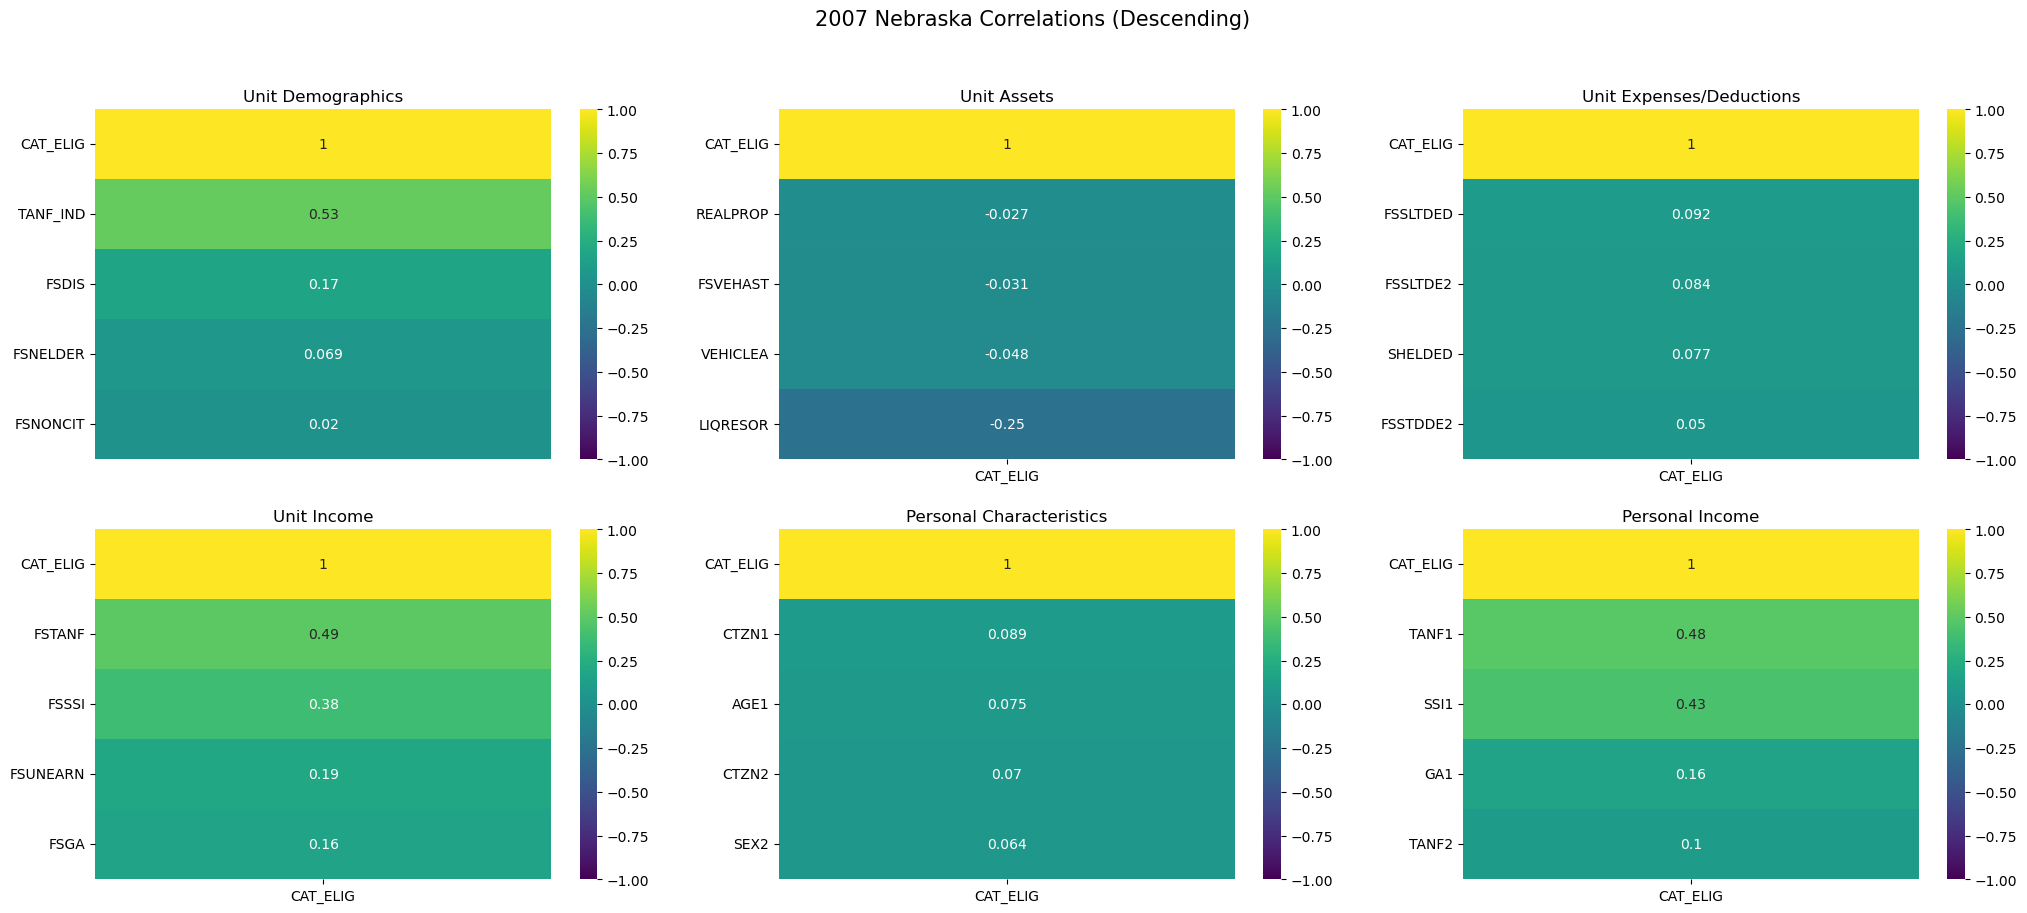

In [10]:
#Nebraska 2007 Correlations Descending
plt.figure(figsize=(25,10))
plt.suptitle("2007 Nebraska Correlations (Descending)", fontsize=15)
plt.subplot(2,3,1)
#2 rows, 3 columns,plot 1 
sns.heatmap(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
#are comparing what you get for corr_df to this .corr()[['CAT_ELIG']]
#sorting by descending to show the strength of correlation
#annot is annotating what each color corresponds to which attribute(xtick lables)
#be sure to call csv files outside of plt code
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Characteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_ne07.png');

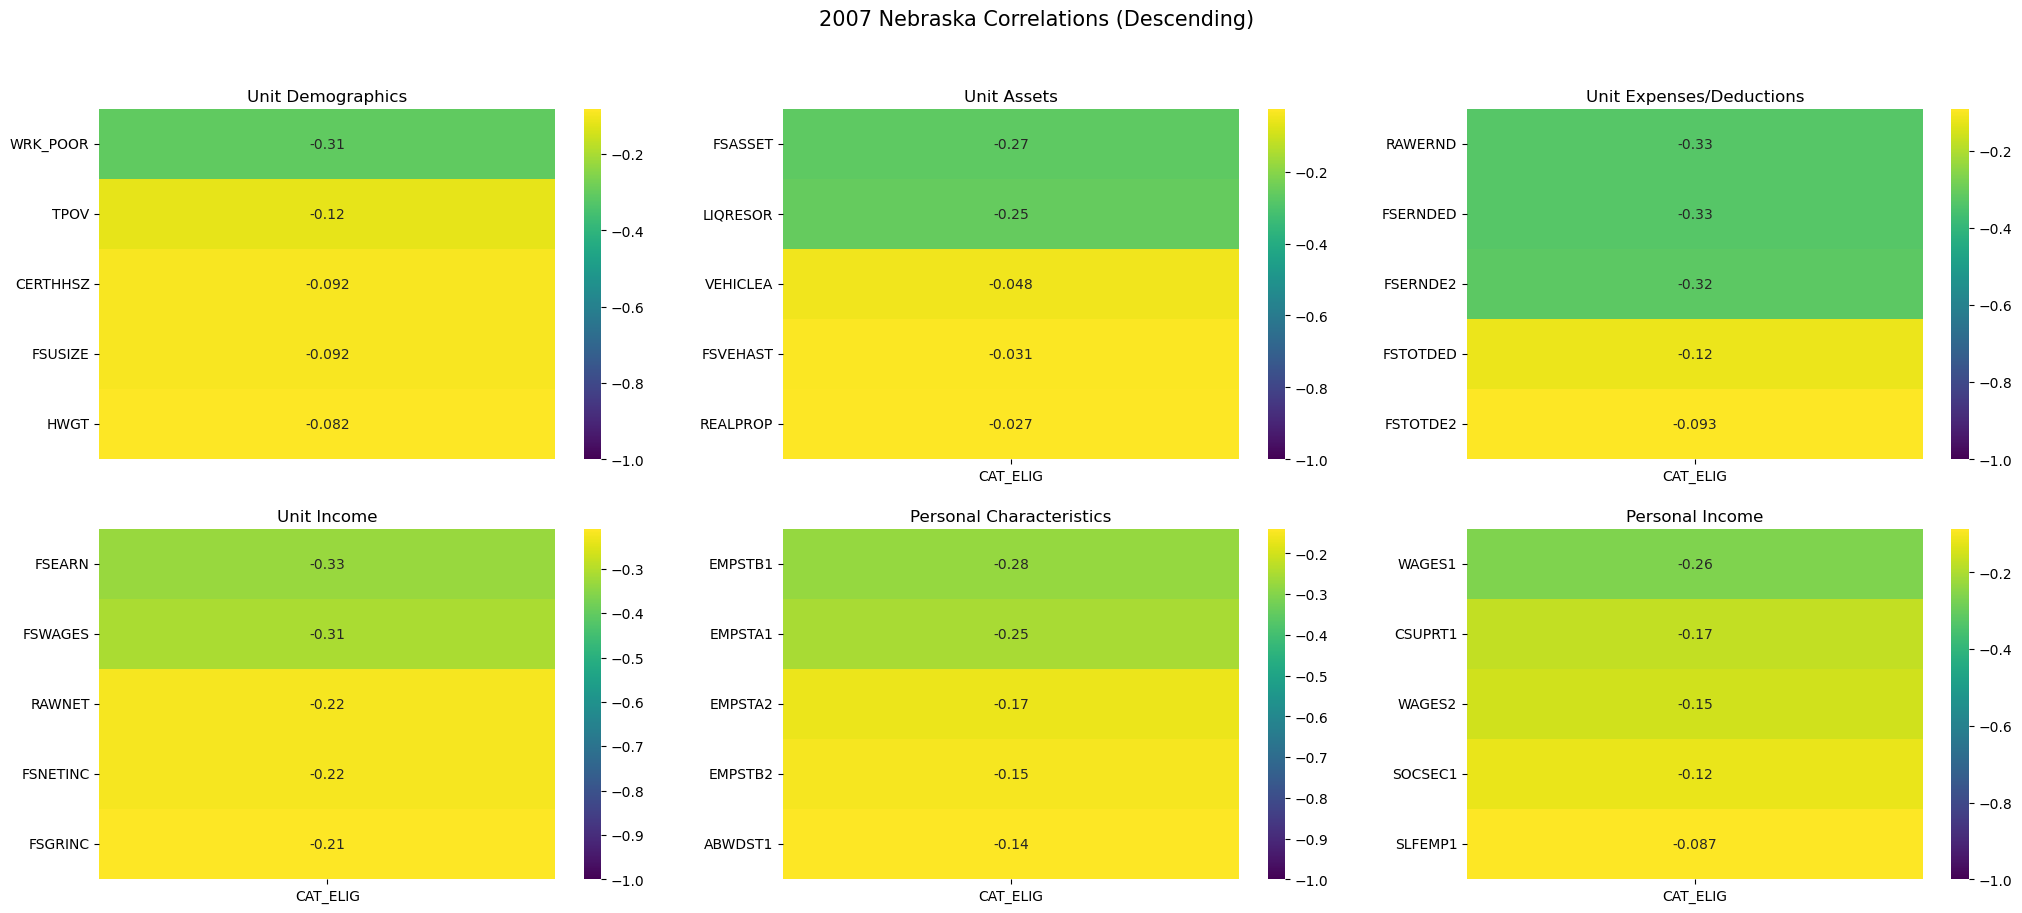

In [11]:
#Nebraska 2007 Correlations Ascending
plt.figure(figsize=(25,10))
plt.suptitle("2007 Nebraska Correlations (Descending)", fontsize=15)
plt.subplot(2,3,1)
#2 rows, 3 columns,plot 1 
sns.heatmap(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
#are comparing what you get for corr_df to this .corr()[['CAT_ELIG']]
#sorting by descending to show the strength of correlation
#annot is annotating what each color corresponds to which attribute(xtick lables)
#be sure to call csv files outside of plt code
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Characteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_ne07.png');

C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


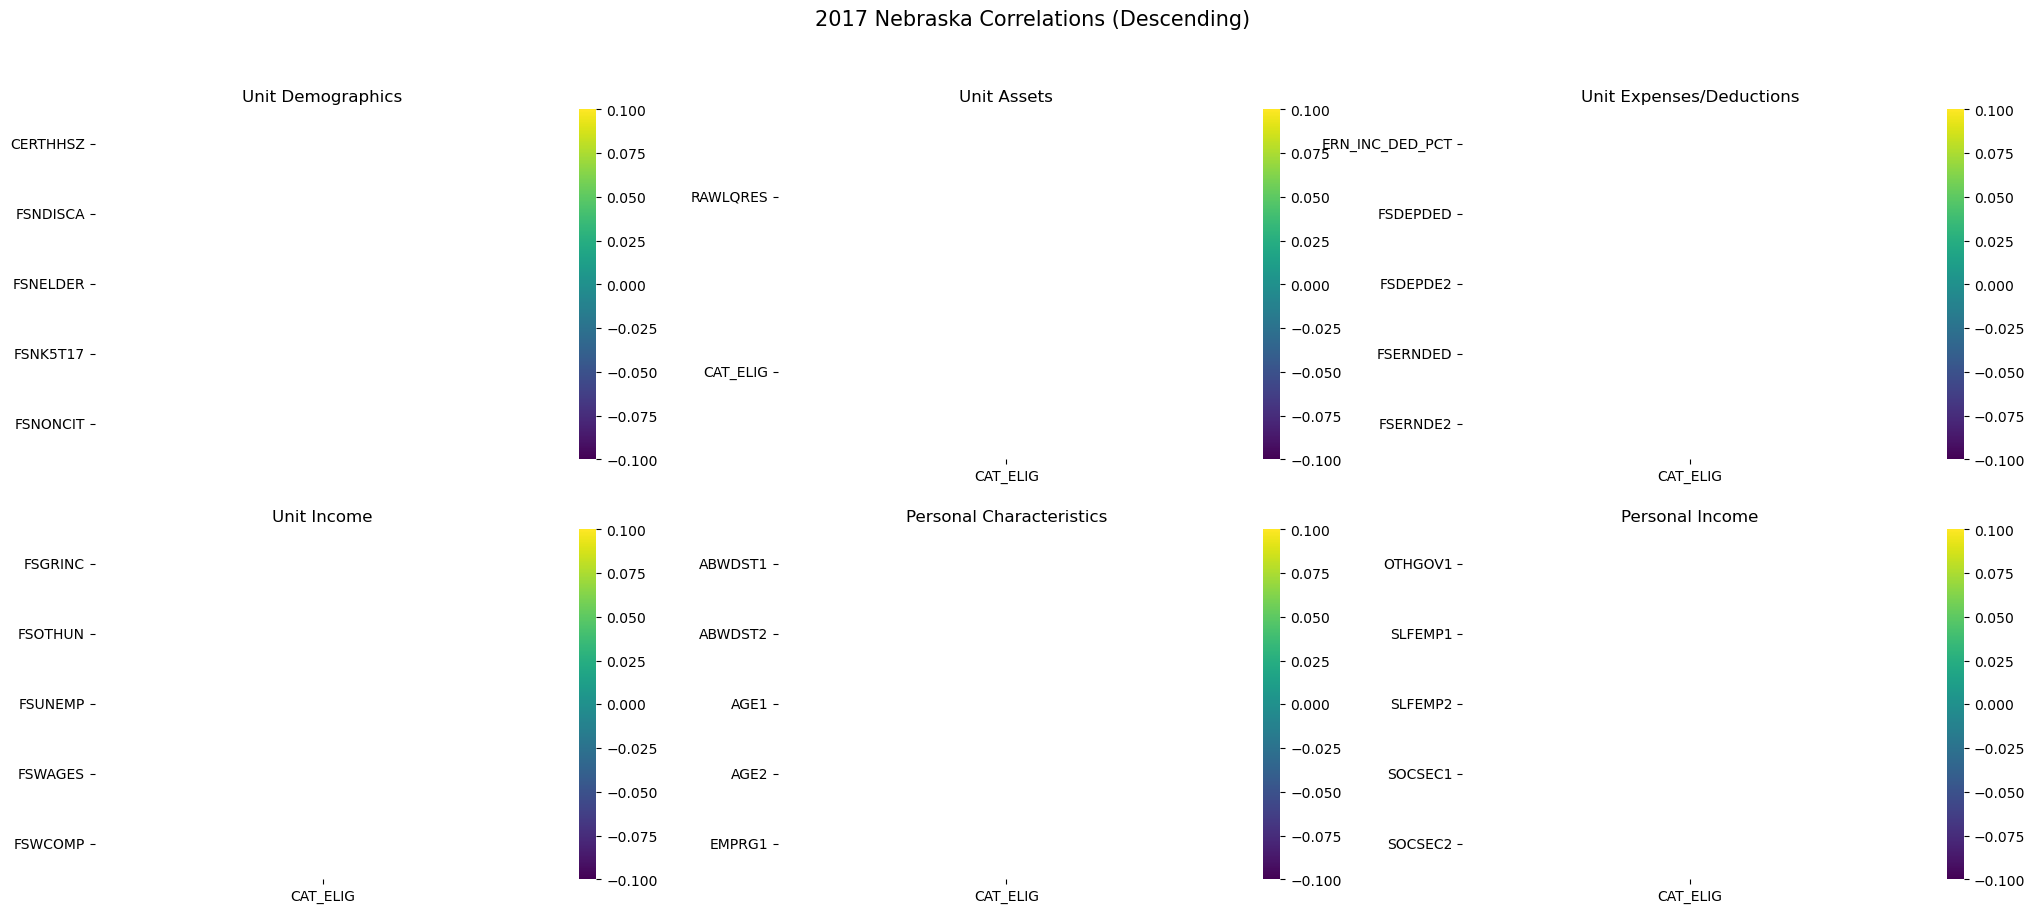

In [12]:
#Nebraska 2017 Correlations Descending
plt.figure(figsize=(25,10))
plt.suptitle("2017 Nebraska Correlations (Descending)", fontsize=15)
plt.subplot(2,3,1)
#2 rows, 3 columns,plot 1 
sns.heatmap(sc.corr_df(ref.unit17_demo, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
#are comparing what you get for corr_df to this .corr()[['CAT_ELIG']]
#sorting by descending to show the strength of correlation
#annot is annotating what each color corresponds to which attribute(xtick lables)
#be sure to call csv files outside of plt code
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit17_assets, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit17_exded, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per17_char, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Characteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_ne17.png');

C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Lily Ewing\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


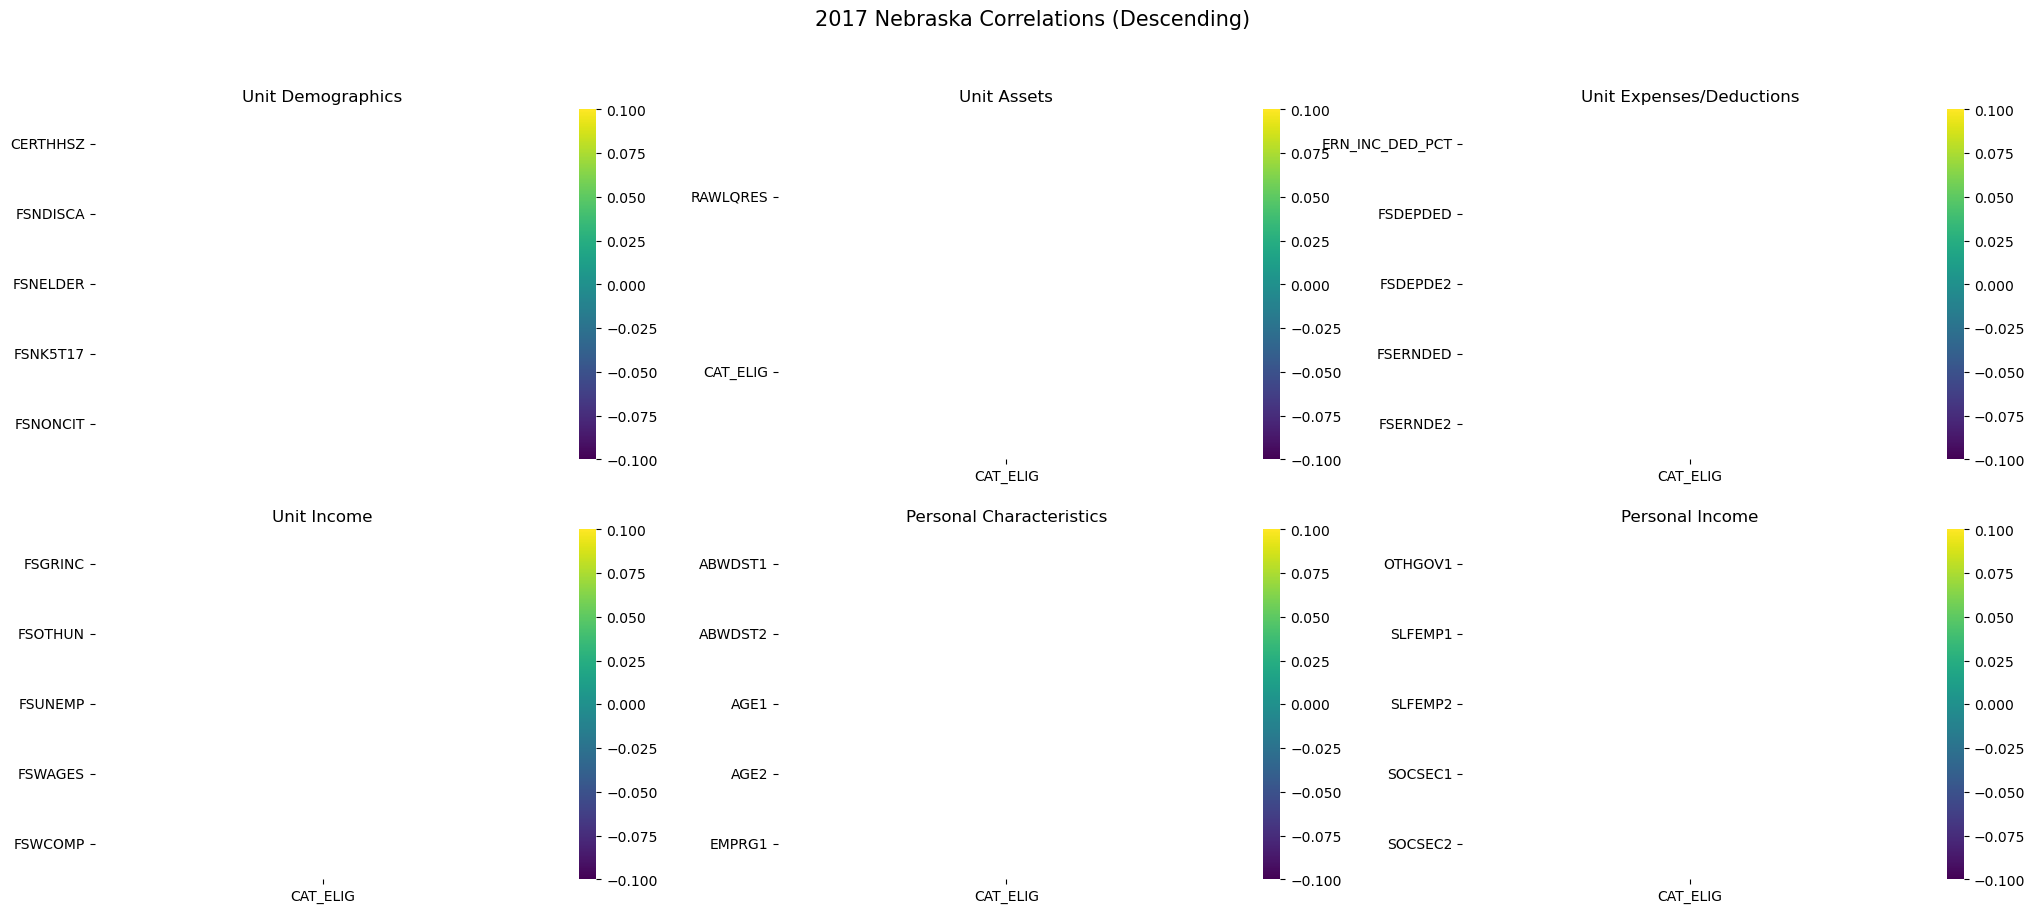

In [13]:
#Nebraska 2017 Correlations Ascending
plt.figure(figsize=(25,10))
plt.suptitle("2017 Nebraska Correlations (Descending)", fontsize=15)
plt.subplot(2,3,1)
#2 rows, 3 columns,plot 1 
sns.heatmap(sc.corr_df(ref.unit17_demo, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
#are comparing what you get for corr_df to this .corr()[['CAT_ELIG']]
#sorting by descending to show the strength of correlation
#annot is annotating what each color corresponds to which attribute(xtick lables)
#be sure to call csv files outside of plt code
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit17_assets, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit17_exded, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per17_char, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Characteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_ne17.png');

Correlated features

In [14]:
#New Mexico07
set1= list(pd.DataFrame(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set2= list(pd.DataFrame(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set3= list(pd.DataFrame(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set4= list(pd.DataFrame(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set5= list(pd.DataFrame(sc.corr_df(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set6= list(pd.DataFrame(sc.corr_df(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)

set7= list(pd.DataFrame(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set8= list(pd.DataFrame(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set9= list(pd.DataFrame(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set10= list(pd.DataFrame(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set11= list(pd.DataFrame(sc.corr_df(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set12= list(pd.DataFrame(sc.corr_df(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)

corr_features= set1+ set2+ set3+ set4+ set5+ set6+ set7+ set8+ set9+ set10+ set11+ set12

In [15]:
#Nebraska07
set1= list(pd.DataFrame(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set2= list(pd.DataFrame(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set3= list(pd.DataFrame(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set4= list(pd.DataFrame(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set5= list(pd.DataFrame(sc.corr_df(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)
set6= list(pd.DataFrame(sc.corr_df(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= False).head(5)).T.columns)

set7= list(pd.DataFrame(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set8= list(pd.DataFrame(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set9= list(pd.DataFrame(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set10= list(pd.DataFrame(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set11= list(pd.DataFrame(sc.corr_df(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)
set12= list(pd.DataFrame(sc.corr_df(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by= 'CAT_ELIG',ascending= True).head(5)).T.columns)

corr_features= set1+ set2+ set3+ set4+ set5+ set6+ set7+ set8+ set9+ set10+ set11+ set12
corr_features= set(corr_features)
corr_features.remove('CAT_ELIG')

In [16]:
print(len(corr_features))

32


In [17]:
print(f'There are {len(corr_features)} features in corr_features:\n')
corr_features

There are 32 features in corr_features:



{'CERTHHSZ',
 'FSASSET',
 'FSDIS',
 'FSEARN',
 'FSERNDE2',
 'FSERNDED',
 'FSGA',
 'FSGRINC',
 'FSNELDER',
 'FSNETINC',
 'FSNONCIT',
 'FSSLTDE2',
 'FSSLTDED',
 'FSSSI',
 'FSSTDDE2',
 'FSTANF',
 'FSTOTDE2',
 'FSTOTDED',
 'FSUNEARN',
 'FSUSIZE',
 'FSVEHAST',
 'FSWAGES',
 'HWGT',
 'LIQRESOR',
 'RAWERND',
 'RAWNET',
 'REALPROP',
 'SHELDED',
 'TANF_IND',
 'TPOV',
 'VEHICLEA',
 'WRK_POOR'}

Final Dataset

In [18]:
corr_features= list(corr_features)
pd.DataFrame(corr_features,columns=['Table 1']).to_csv("./data/corr_features.csv",index=None)

In [19]:
df1= sc.final(corr_features, nm07)
df2= sc.final(corr_features, nm17)
df3= sc.final(corr_features, ne07)
df4= sc.final(corr_features, ne17)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(1255, 31)
(964, 28)
(791, 33)
(964, 28)


In [20]:
df= pd.concat([df1, df2, df3, df4])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 963
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RAWERND   3974 non-null   float64
 1   HWGT      3974 non-null   float64
 2   FSTOTDE2  3974 non-null   float64
 3   FSSLTDE2  3974 non-null   float64
 4   FSNELDER  3974 non-null   float64
 5   FSSLTDED  3974 non-null   float64
 6   FSTOTDED  3974 non-null   float64
 7   FSGA      3974 non-null   float64
 8   WRK_POOR  3974 non-null   float64
 9   FSEARN    3974 non-null   float64
 10  REALPROP  2046 non-null   float64
 11  FSASSET   2046 non-null   float64
 12  FSNONCIT  3974 non-null   float64
 13  FSGRINC   3974 non-null   float64
 14  SHELDED   3974 non-null   float64
 15  LIQRESOR  2046 non-null   float64
 16  FSTANF    3974 non-null   float64
 17  FSUSIZE   3974 non-null   float64
 18  FSSTDDE2  3974 non-null   float64
 19  FSERNDED  3974 non-null   float64
 20  FSWAGES   3974 non-null   float